In [ ]:
#Importing all the required tools and libraries
import pandas as pd
import numpy as np
import re
import string
import matplotlib.pyplot as plt
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from imblearn.over_sampling import RandomOverSampler,SMOTE
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import *

#Defining custom stopwords
stop=['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against','between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then','once','since','yesterday','today','didn','tomorrow','monday','tuesday','wednesday','thursday','friday','saturday','sunday','hmm','http','https','www','com', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y']


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
#Dataset used is same as given here: https://data.world/crowdflower/sentiment-analysis-in-text
url='https://raw.githubusercontent.com/Giohanny/Twitter-Sentiment-Analysis/master/text_emotion.csv'

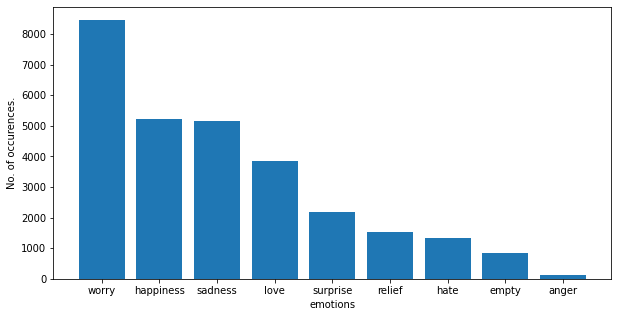

In [ ]:
#Storing the data into a Pandas DataFrame
data = pd.read_csv(url,index_col='sentiment')

#Selecting required emotions
data.drop(["neutral","enthusiasm","fun","boredom"],inplace=True)
data=data.reset_index()

#Plotting the data using matlibplot library
xval=data['sentiment'].value_counts().keys().tolist()
yval=data['sentiment'].value_counts().tolist()
plt.figure(figsize=(10,5))
plt.xlabel('emotions')
plt.ylabel('No. of occurences.')
plt.bar(xval,yval)
plt.show()

In [ ]:
#Data Cleaning

#Converting all the words to lowercase
data.content=data.content.str.lower()

#Removing the twitter usernames mentions
data['content']=data['content'].apply(lambda x:' '.join(re.sub('@[a-zA-Z0-9]+','',x).split()))

#Removing digits
data['content']=data['content'].apply(lambda x:' '.join(re.sub('[\d]','',x).split()))

#Removing special characters
data['content']=data['content'].apply(lambda x:' '.join(re.sub('[^a-z ]',' ',x).split()))

#Removing stopwords
data['content']=data['content'].apply(lambda x:' '.join(x for x in x.split() if x not in stop))

#Spell correction by reducing character repetition to 2(eg. goooodddd to goodd)
data['content']=data['content'].apply(lambda x:' '.join(re.sub('(.)\\1{2,}','\\1\\1',x).split()))

#Lemmatizing the words in the sentences
wnl=WordNetLemmatizer()
data['content']=data['content'].apply(lambda x:' '.join(wnl.lemmatize(x) for x in x.split()))

#Removing single characters and 
data['content']=data['content'].apply(lambda x:' '.join(re.sub('\s+[a-zA-Z]\s+',' ',x).split()))
data['content']=data['content'].apply(lambda x:' '.join(re.sub('\s+',' ',x).split()))



#Displaying the cleaned data
data


,sentiment,tweet_id,author,content
0,empty,1956967341,xoshayzers,know listenin habit earlier started freakin part
1,sadness,1956967666,wannamama,layin headache ughh waitin call
2,sadness,1956967696,coolfunky,funeral ceremony gloomy
3,worry,1956968477,xxxPEACHESxxx,pinging prom like friend
4,sadness,1956968487,ShansBee,sleep thinking friend want married damn want s...
...,...,...,...,...
28643,happiness,1753918900,courtside101,succesfully following tayla
28644,love,1753919001,drapeaux,happy mother love
28645,love,1753919005,JenniRox,happy mother mommy woman long momma someone
28646,happiness,1753919043,ipdaman1,wassup beautiful follow peep single myspace ip...


In [ ]:
#Converting text features into TF-IDF feature vectors
tf=TfidfVectorizer(analyzer="word",max_features=8000)
X=tf.fit_transform(data['content'])
y=data['sentiment'].values

#Applying SMOTE to evenly distribute the data
ros = SMOTE(random_state=250,k_neighbors=1)
X_ROS, y_ROS = ros.fit_sample(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
#Dividing the data into train and test data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_ROS, y_ROS,random_state=50,test_size=0.15)

0.702539404553415
              precision    recall  f1-score   support

       anger       0.90      0.97      0.93      1182
       empty       0.96      0.50      0.66      2361
   happiness       0.53      0.64      0.58      1090
        hate       0.79      0.89      0.84      1071
        love       0.64      0.79      0.70      1049
      relief       0.74      0.86      0.80      1077
     sadness       0.44      0.73      0.55       807
    surprise       0.63      0.88      0.73       915
       worry       0.73      0.48      0.58      1868

    accuracy                           0.70     11420
   macro avg       0.71      0.75      0.71     11420
weighted avg       0.75      0.70      0.70     11420



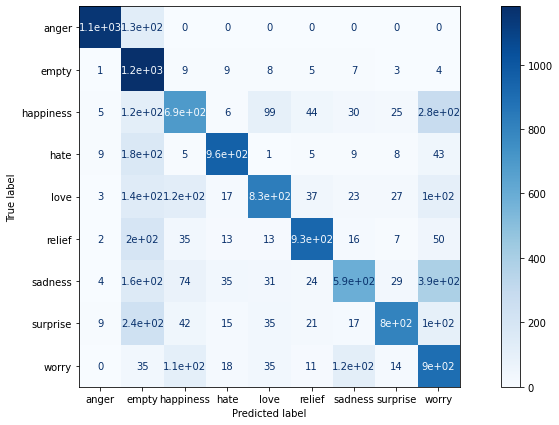

In [ ]:
#Using SVC
svc=svm.SVC()
svc.fit(X_train,y_train)
pred=svc.predict(X_test)

#Displaying metrics
print(accuracy_score(pred,y_test)*100)
print(classification_report(pred,y_test))
fig,ax = plt.subplots(figsize=(20,8))
plot_confusion_matrix(svc,X_test,y_test,cmap=plt.cm.Blues,ax=ax)

0.724430823117338
              precision    recall  f1-score   support

       anger       0.95      0.96      0.96      1272
       empty       0.95      0.72      0.82      1615
   happiness       0.56      0.57      0.57      1265
        hate       0.89      0.85      0.87      1266
        love       0.68      0.77      0.73      1148
      relief       0.85      0.78      0.82      1373
     sadness       0.48      0.62      0.54      1026
    surprise       0.74      0.78      0.76      1214
       worry       0.45      0.45      0.45      1241

    accuracy                           0.72     11420
   macro avg       0.73      0.72      0.72     11420
weighted avg       0.74      0.72      0.73     11420



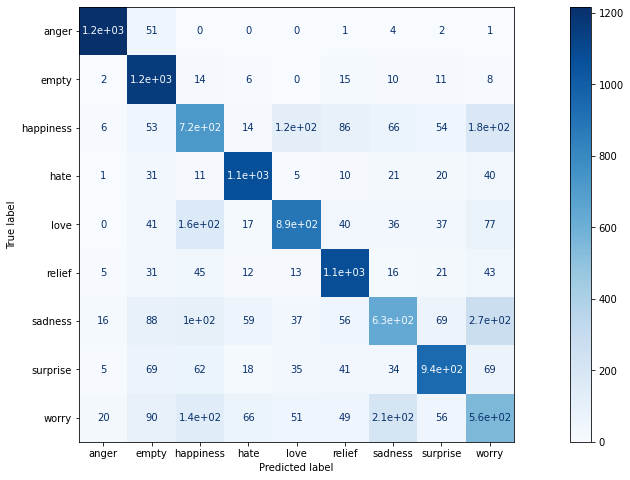

In [ ]:
#Using RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=150, max_depth=5000, max_features=2500,n_jobs=-1)
rfc.fit(X_train ,y_train)
pred=rfc.predict(X_test )

#Displaying performance metrics
print(accuracy_score(pred,y_test))
print(classification_report(pred,y_test))
fig,ax = plt.subplots(figsize=(20, 8))
plot_confusion_matrix(rfc,X_test,y_test,cmap=plt.cm.Blues,ax=ax)

0.604553415061296
              precision    recall  f1-score   support

       anger       0.96      0.86      0.91      1423
       empty       0.89      0.52      0.66      2078
   happiness       0.42      0.50      0.46      1100
        hate       0.78      0.71      0.74      1341
        love       0.54      0.63      0.58      1129
      relief       0.66      0.63      0.65      1331
     sadness       0.36      0.50      0.42       961
    surprise       0.55      0.62      0.58      1145
       worry       0.29      0.39      0.33       912

    accuracy                           0.60     11420
   macro avg       0.61      0.60      0.59     11420
weighted avg       0.65      0.60      0.62     11420



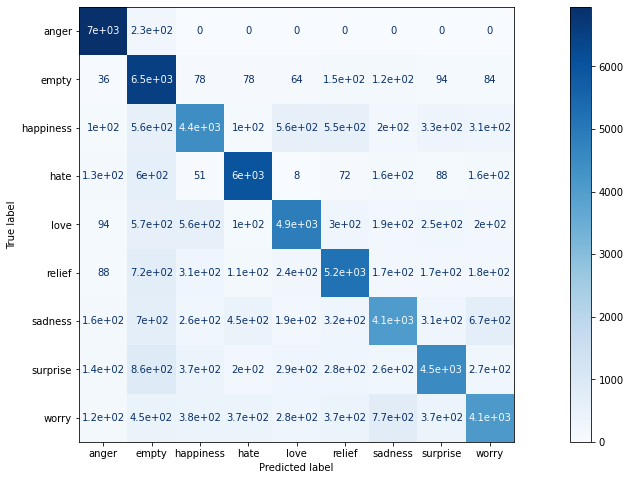

In [ ]:
#Using LinearSVC
lsvc=LinearSVC(C=0.75,max_iter=5000)
lsvc.fit(X_train,y_train)
pred=lsvc.predict(X_test)

#Displaying performance metrics
print(accuracy_score(pred,y_test))
print(classification_report(pred,y_test))
fig,ax = plt.subplots(figsize=(20, 8))
plot_confusion_matrix(lsvc,X_train,y_train,cmap=plt.cm.Blues,ax=ax)

In [ ]:
#Testing on demo data
sen=pd.DataFrame(['No worries, its fine','He was completely puzzled.',
                  'I love my country.',
                  'I got into a heated argument with one of my friends.',
                  'He was upset as he could not score.',
                  'I am excited for this trip.',
                  'So what should I do now?',
                  "Due to heavy rain I could not attend my friend's birthday party."])

#Some data cleaning
sen[0]=sen[0].str.lower()
sen[0]=sen[0].apply(lambda x:' '.join(re.sub('@[a-zA-Z0-9]+','',x).split()))
sen[0]=sen[0].apply(lambda x:' '.join(re.sub('[\d]','',x).split()))
sen[0]=sen[0].apply(lambda x:' '.join(re.sub('[^a-z ]',' ',x).split()))
wnl1=WordNetLemmatizer()
sen[0]=sen[0].apply(lambda x:' '.join(x for x in x.split() if x not in stop))
sen[0]=sen[0].apply(lambda x:' '.join(wnl1.lemmatize(x) for x in x.split()))
sen[0]=sen[0].apply(lambda x:' '.join(re.sub('\s+[a-zA-Z]\s+',' ',x).split()))
sen[0]=sen[0].apply(lambda x:' '.join(re.sub('\s+',' ',x).split()))
print(sen[0])
 
sen_vec=tf.transform(sen[0])
sen_pre_svc=clf.predict(sen_vec)
sen_pre_rfc=clf.predict(sen_vec)
sen_pre_lsvc=clf.predict(sen_vec)
sen['label by SVC']=sen_pre_svc
sen['label by RFC']=sen_pre_rfc
sen['label by LSVC']=sen_pre_lsvc
sen

0                                        no worry fine
1                                   completely puzzled
2                                         love country
3                       got heated argument one friend
4                                upset could not score
5                                         excited trip
6                                                     
7    due heavy rain could not attend friend birthda...
Name: 0, dtype: object


,0,label by SVC,label by RFC,label by LSVC
0,no worry fine,relief,relief,relief
1,completely puzzled,surprise,surprise,surprise
2,love country,love,love,love
3,got heated argument one friend,hate,hate,hate
4,upset could not score,worry,worry,worry
5,excited trip,happiness,happiness,happiness
6,,empty,empty,empty
7,due heavy rain could not attend friend birthda...,sadness,sadness,sadness
